# Image Preprocessing and Visualization on Frog Images

[Back to Main](../Project.ipynb)

In this segment, we will inspect images that primarily possess a white background. The objective is to apply thresholding to accentuate the prominent features of these images. This approach can be invaluable when aiming to distinguish or track specific attributes or objects within images. In the dataset we have, our focus is primarily on images of frogs. Frogs, being amphibians, can be found in a variety of terrains and backgrounds, ranging from lush green forests to ponds with clear water.

By conducting an analysis on the frog images, we aim to:
- **Isolate the subjects** by identifying images with predominantly white backgrounds.
- **Enhance the attributes** of the frogs using thresholding, making them more distinguishable.
- **Refine our results** by applying morphological operations to further emphasize the features of interest.

### Import dependencies

First, we'll import the necessary libraries and load the dataset. We'll then visualize the number of images per class and display sample images from each class.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.datasets import cifar10

### Loading the CIFAR-10 Dataset

The CIFAR-10 dataset is a well-known dataset used in the machine learning community, mainly for image classification tasks. It consists of 60,000 32x32 color images across 10 different classes, with 6,000 images per class. The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.

In [2]:
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = cifar10.load_data()

Here, we use the `cifar10.load_data()` method to fetch both the training and testing datasets. The method returns images and their associated labels for both the training and test sets.

### Image Normalization

Normalization is a preprocessing step where pixel values of images, originally ranging from 0 to 255, are scaled down to a range of [0, 1]. This often helps in ensuring that the optimization algorithm (like Gradient Descent) converges faster during the training process.

In [3]:
train_images_cifar = train_images_cifar.astype('float32') / 255.0

By converting the image data type to `float32` and dividing by 255, we achieve this normalization.

### Extracting Images of the 'Frog' Class

Each image in the CIFAR-10 dataset is associated with a label, an integer from 0 to 9. Each integer corresponds to a particular class (like airplane, automobile, bird, etc.). In this dataset, the label `6` corresponds to the 'frog' class.

In [4]:
frog_class_id = 6
frog_images = train_images_cifar[train_labels_cifar.flatten() == frog_class_id]

We use NumPy's indexing capabilities to filter and extract all images in the training set that belong to the 'frog' class. The `flatten()` method is used to convert the 2D label array into a 1D array for ease of indexing. Now we have a collection of `frog_images` from the CIFAR-10 training dataset ready for any further analysis or processing.

## Image Processing for 'Frog' Images with White Backgrounds

In this code, various image processing methods are applied to 'frog' images, especially focusing on those with predominantly white backgrounds.

### Inverting an Image

The `invert_image` function inverts the pixel values of an image, which is often referred to as a negative transformation.

In [5]:
def invert_image(image):
    return 255 - image

This function subtracts each pixel value from 255, effectively flipping the image colors.

### Detecting White Background

The `has_white_background` function checks if an image predominantly has a white background.

In [6]:
# Function to check if the image predominantly has a white background
def has_white_background(image):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor((image*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    
    # Calculate the average pixel value
    mean_pixel_value = np.mean(gray_img)
    
    # Check if the average value exceeds a specific threshold
    return mean_pixel_value > 210

This function converts the image to grayscale, computes the average pixel value, and checks if this average surpasses a threshold, indicating a white background.

### Image Thresholding

The `threshold_image` function applies thresholding to the image, setting pixel values above a threshold to white and those below to black.

In [7]:
# Function to apply thresholding to an image
def threshold_image(image):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor((image*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    # Apply thresholding
    _, thresholded = cv2.threshold(gray_img, 180, 255, cv2.THRESH_BINARY_INV)
    return thresholded

Here, binary inversion is applied, meaning regions with pixel values above the threshold are set to black and those below are set to white.

### Morphological Processing

The `morphological_processing` function performs morphological opening on an image. This process is useful for noise reduction.

In [8]:
# Function to process the image using morphological operations
def morphological_processing(image):
    # Apply morphological opening to remove small noise
    kernel = np.ones((3,3), np.uint8)
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened

A kernel (a small matrix) is used to process the image, focusing on its structural elements.

### Filtering and Visualizing the Images

After defining the above functions, the code filters out frog images with a white background.

In [9]:
# Filter the frog images with a white background
white_background_frogs = [img for img in frog_images if has_white_background(img)]

For visualization, a few operations are performed on these images: thresholding, inverting the threshold, and morphological processing. Then, the results of these operations, along with the original image, are displayed side by side.

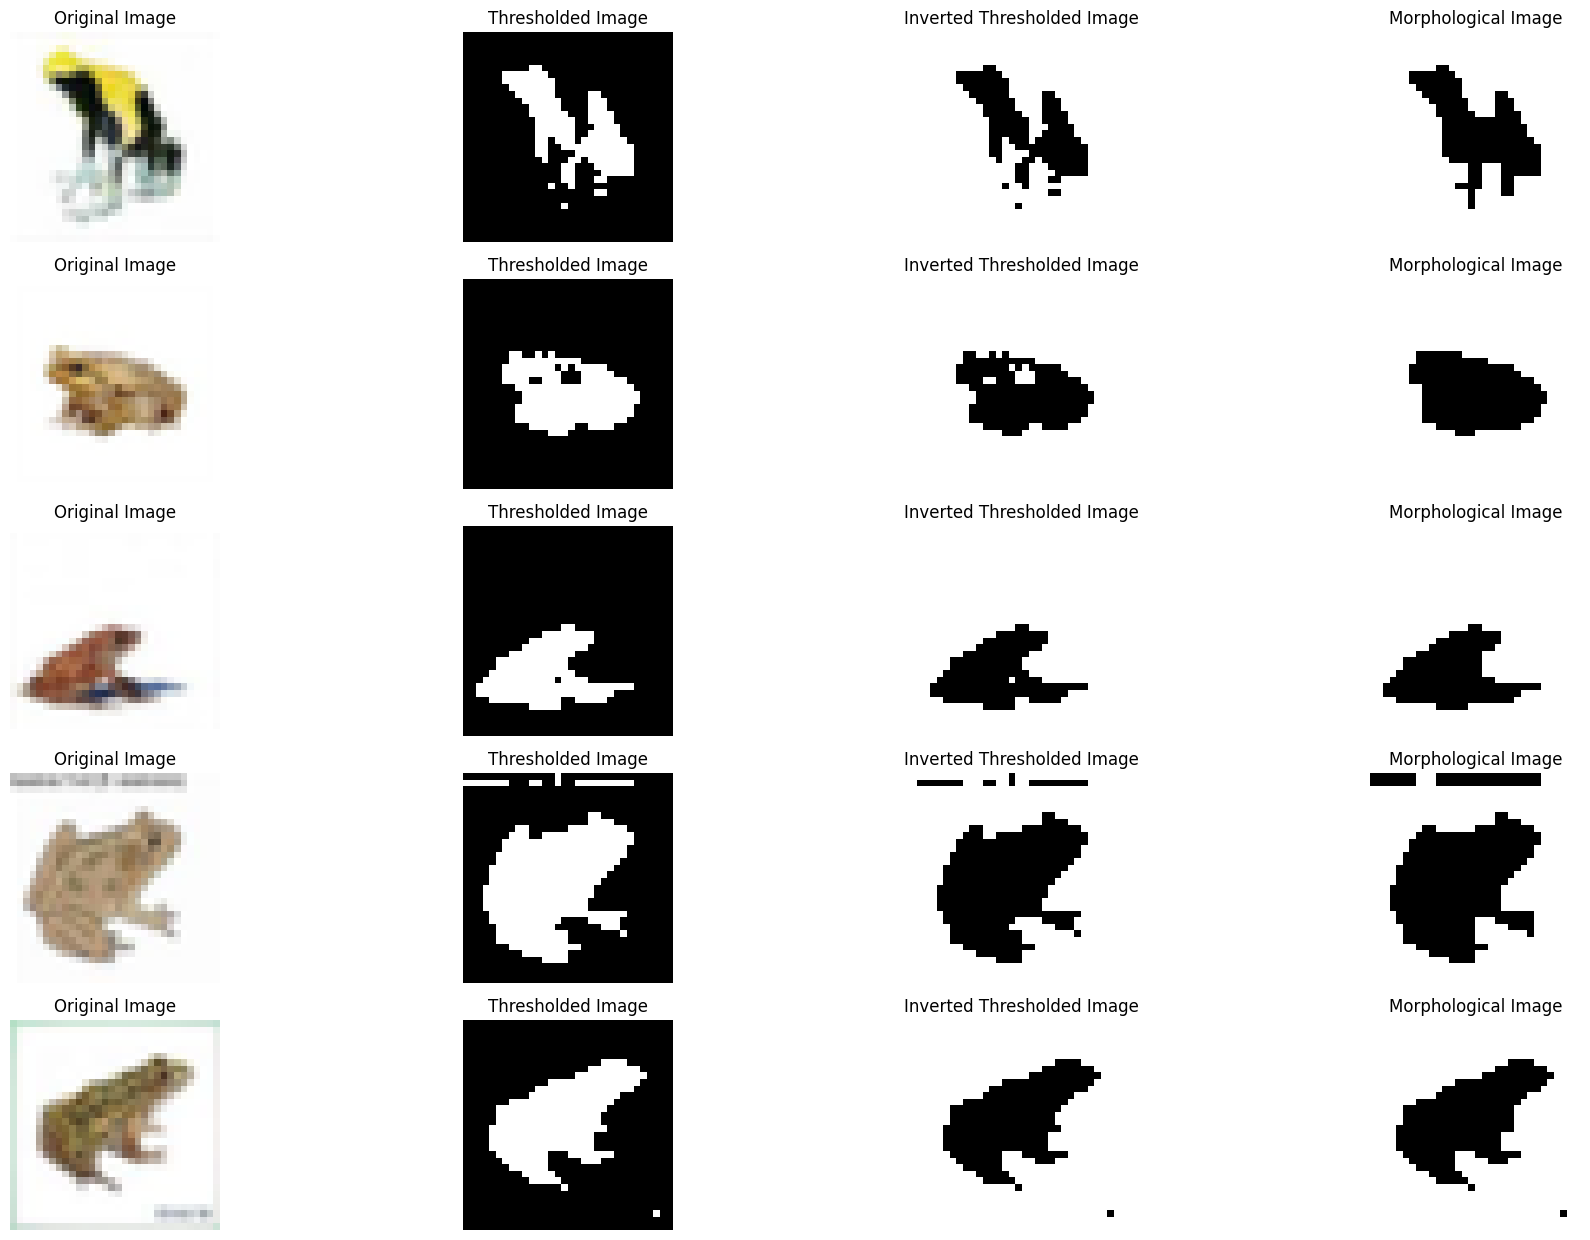

In [10]:
# Visualization of the images
num_images = 5  # Number of images to display

# Apply thresholding on the selected images
thresholded_images = [threshold_image(img) for img in white_background_frogs]
# Invert the thresholded images
inverted_thresholded_images = [invert_image(img) for img in thresholded_images]
# Apply morphological processing to the inverted thresholded images
morphological_images = [morphological_processing(img) for img in inverted_thresholded_images]

# Display the original, thresholded, inverted, and morphological images
num_images = min(num_images, len(white_background_frogs))

plt.figure(figsize=(20, num_images*2.5))
for i in range(num_images):
    # Display the original image
    plt.subplot(num_images, 4, 4*i + 1)
    plt.imshow(white_background_frogs[i])
    plt.title('Original Image')
    plt.axis('off')
    
    # Display the thresholded image
    plt.subplot(num_images, 4, 4*i + 2)
    plt.imshow(thresholded_images[i], cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')
    
    # Display the inverted thresholded image
    plt.subplot(num_images, 4, 4*i + 3)
    plt.imshow(inverted_thresholded_images[i], cmap='gray')
    plt.title('Inverted Thresholded Image')
    plt.axis('off')
    
    # Display the morphological processed image
    plt.subplot(num_images, 4, 4*i + 4)
    plt.imshow(morphological_images[i], cmap='gray')
    plt.title('Morphological Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Insights from the Analysis

Upon visual inspection of the processed images, several observations are noteworthy:

1. **Isolation of Subjects**: The initial step of isolating images based on a white background helps narrow down our dataset and reduces the variability introduced by different backgrounds.

2. **Enhanced Attributes**: By applying thresholding, we accentuate the primary features of the frogs against the white background. This step is particularly valuable in delineating the frog's silhouette and potential markings.

3. **Refinement using Morphology**: Morphological operations further refine our image by removing small noise. This is evident in the 'Morphological Image', where the subject's outline is smoother, and finer details are more pronounced compared to the thresholded images.

Moving forward, this preprocessing pipeline can be invaluable for:
- **Object Detection**: Where specific attributes of the frogs, such as spots or unique markings, are of interest.
- **Population Studies**: Where the aim might be to track and count the number of frogs in different images.
- **Further Analysis**: Such as texture analysis, pattern recognition, or even machine learning tasks, where a consistent and clear image background can aid in feature extraction.

## Analyzing Morphological Transformations: Dilation and Erosion

Having isolated and accentuated our subjects, the frogs, in the earlier segment, we now move to a nuanced level of image analysis. The morphological transformations, particularly Dilation and Erosion, are powerful tools in the domain of image processing. They can be pivotal in identifying and rectifying small irregularities within the image, like gaps, holes, or unwanted specks.

**Objective**: 
- To visually and quantitatively analyze the impact of Dilation and Erosion on the inverted images of frogs.
- Identify areas outside the main image or white parts within it that might need further processing.

This segment provides an interactive tool that lets us modify each image using these morphological operations and immediately observe their effects.

In [11]:
# Function to Modify Image using Morphological Transformations
def modify_image(image, dilate_iterations=1, erode_iterations=1):
    kernel = np.ones((2, 3), np.uint8)
    
    # Dilation operation
    dilated = cv2.dilate(image, kernel, iterations=dilate_iterations)
    
    # Erosion operation
    eroded = cv2.erode(dilated, kernel, iterations=erode_iterations)
    
    return eroded

# Function for Interactive Display of Modified Image and Intensity Graphs
def interactive_plot(image, idx=0):
    def plot(dilate_iterations: int, erode_iterations: int):
        modified_image = modify_image(image, dilate_iterations, erode_iterations)
        
        # Setting up figure and axis for plots
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('Interactive Image Analysis with Morphological Transformations', fontsize=16)
        
        ax_img, ax_row, ax_col = axs

        # Displaying the modified image
        ax_img.imshow(modified_image, cmap='gray', aspect='auto')
        ax_img.set_title(f'Modified Image {idx+1}')
        ax_img.axis('off')

        # Plotting row intensity
        row_intensity = np.mean(modified_image, axis=1)
        ax_row.plot(row_intensity, np.arange(len(row_intensity)), 'b-')
        ax_row.set_xlabel('Mean Intensity')
        ax_row.set_ylabel('Row')
        ax_row.set_title(f'Row Intensity {idx+1}')
        ax_row.invert_yaxis()  
        ax_row.grid(True)

        # Plotting column intensity
        col_intensity = np.mean(modified_image, axis=0)
        ax_col.plot(np.arange(len(col_intensity)), col_intensity, 'r-')
        ax_col.set_ylabel('Mean Intensity')
        ax_col.set_xlabel('Column')
        ax_col.set_title(f'Column Intensity {idx+1}')
        ax_col.invert_yaxis()
        ax_col.grid(True)


        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Setting up interactive sliders for Dilation and Erosion
    dilate_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description='Dilate')
    erode_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description='Erode')
    ui = widgets.HBox([dilate_slider, erode_slider])

    out = widgets.interactive_output(plot, {'dilate_iterations': dilate_slider, 'erode_iterations': erode_slider})

    # Displaying the UI components
    display(ui, out)

# Applying interactive plots for the sample of inverted thresholded images
for idx, image in enumerate(inverted_thresholded_images[:5]):
    interactive_plot(image, idx)


Output()

Output()

Output()

Output()

Output()

### Observations and Hypotheses:

1. **Intuitive Understanding**: With the interactive sliders for each image, it's evident how Dilation and Erosion operations affect the structure of the image. Dilation tends to expand the white regions, potentially filling small holes, while Erosion tends to reduce them, potentially removing small white specks or noise.

2. **Row and Column Intensity Profiles**: These graphs give us a quantitative measure of the changes in the image. Peaks in these graphs correspond to the regions with significant white areas. By modifying the iterations of dilation and erosion, we observe shifts in these peaks, indicating the morphological changes in the image.

3. **Hypotheses**:
   - If we detect consistent patterns of peaks in the intensity graphs across multiple images, it might suggest a common structural attribute among the frogs or the way the images were captured.
   - Tweaking the iterations for dilation might help in filling internal holes within the frog's structure, making it more continuous.
   - Adjusting erosion can help in smoothening the edges and eliminating tiny specks that might be artifacts or noise.

In conclusion, through this interactive analysis, we've gained deeper insights into the structural nuances of our frog images. Understanding these transformations will guide us in refining our preprocessing pipeline, ensuring cleaner and more consistent data for further tasks.

## Analysis 

From the visualization above, it is evident that thresholding accentuates the distinct features of the images, particularly when applied to images with a predominantly white background. Such preprocessing can aid in subsequent image analysis tasks like segmentation, feature extraction, or object recognition.

## **Introduction to Image Intensity Analysis**

Image processing often delves deep into the exploration of features within images. One such method to glean valuable insights is through the analysis of pixel intensity across rows and columns of images. This report aims to apply this method to a series of images and derive meaningful patterns from the data.

### **Why This Analysis?**

Pixel intensity can be likened to the 'heartbeat' of an image. Just as cardiologists might analyze an ECG to understand heart health, intensity analysis can yield insights about the features and structures present within the image. Specifically:

1. **Object Recognition:** If the background is of a solid color and there's an object upon it, the intensity peaks can pinpoint where this object starts and ends.
2. **Image Segmentation:** For tasks that require isolating specific regions of the image, the peaks can guide where these regions are.
3. **Orientation and Shape:** The distribution and nature of these peaks can suggest the shape, size, and orientation of the objects within the image.

In the subsequent code, we embark on this journey of pixel intensity analysis. By employing techniques like thresholding and morphological operations, we intend to process each image, making the primary features within it stand out, and then analyze the intensity across its breadth and width.

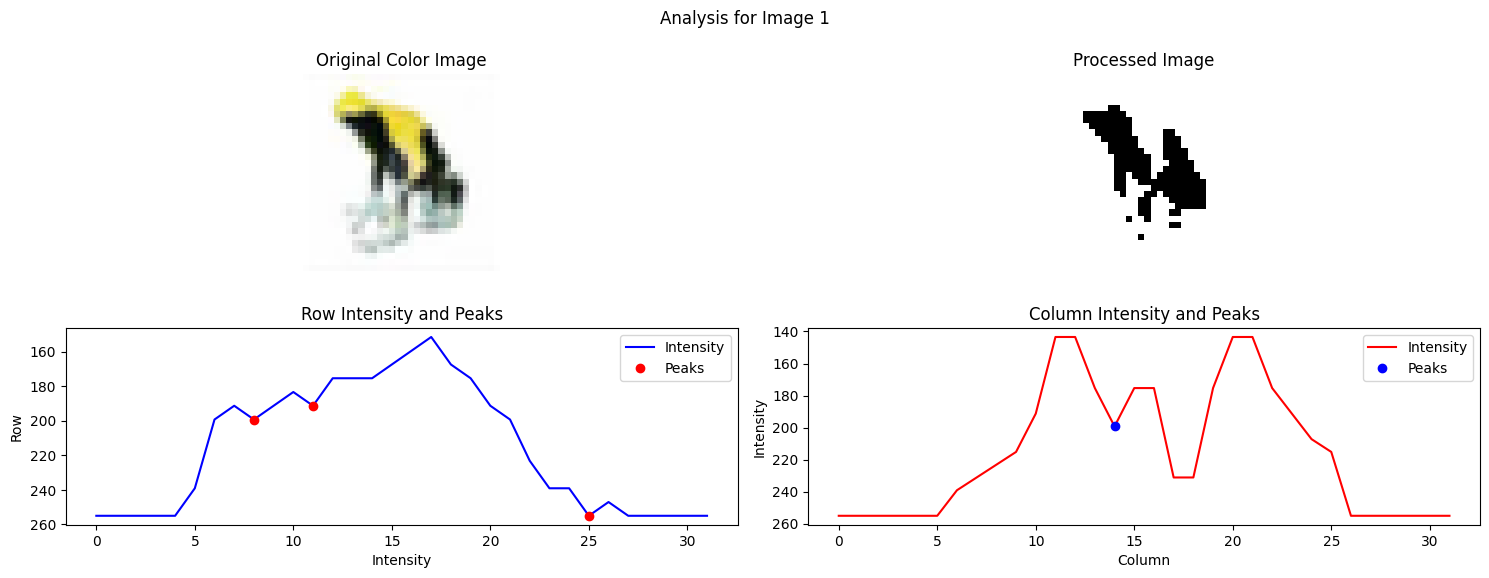

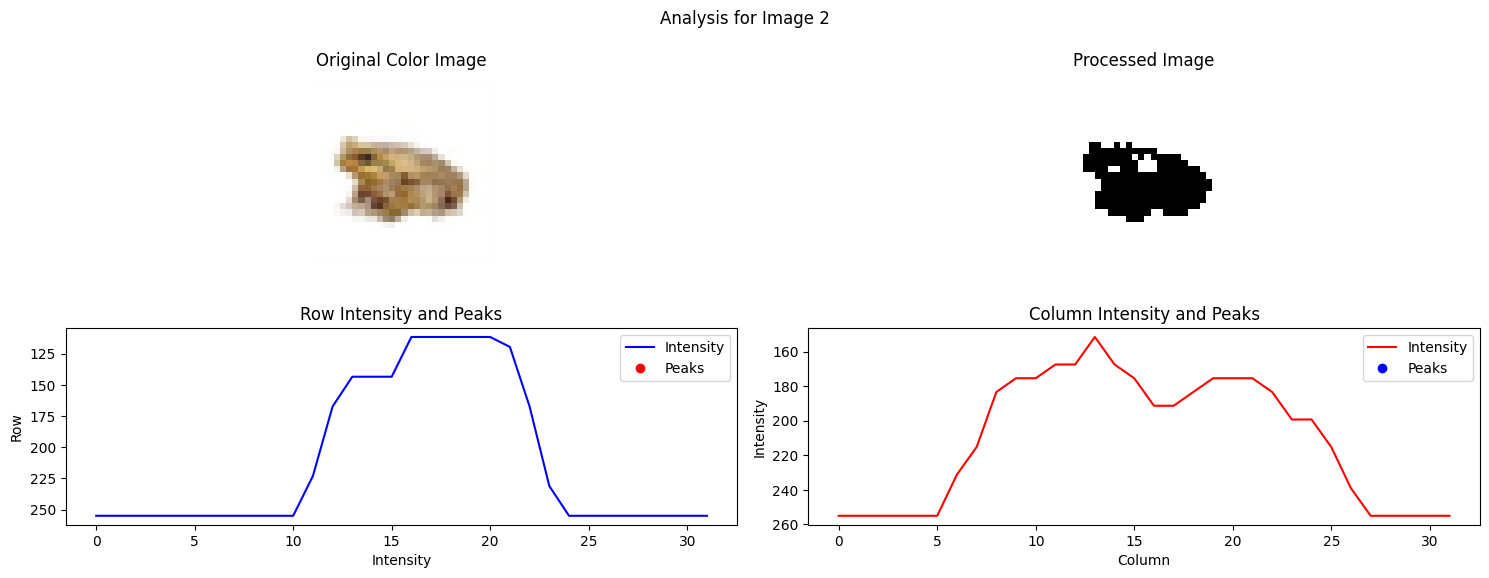

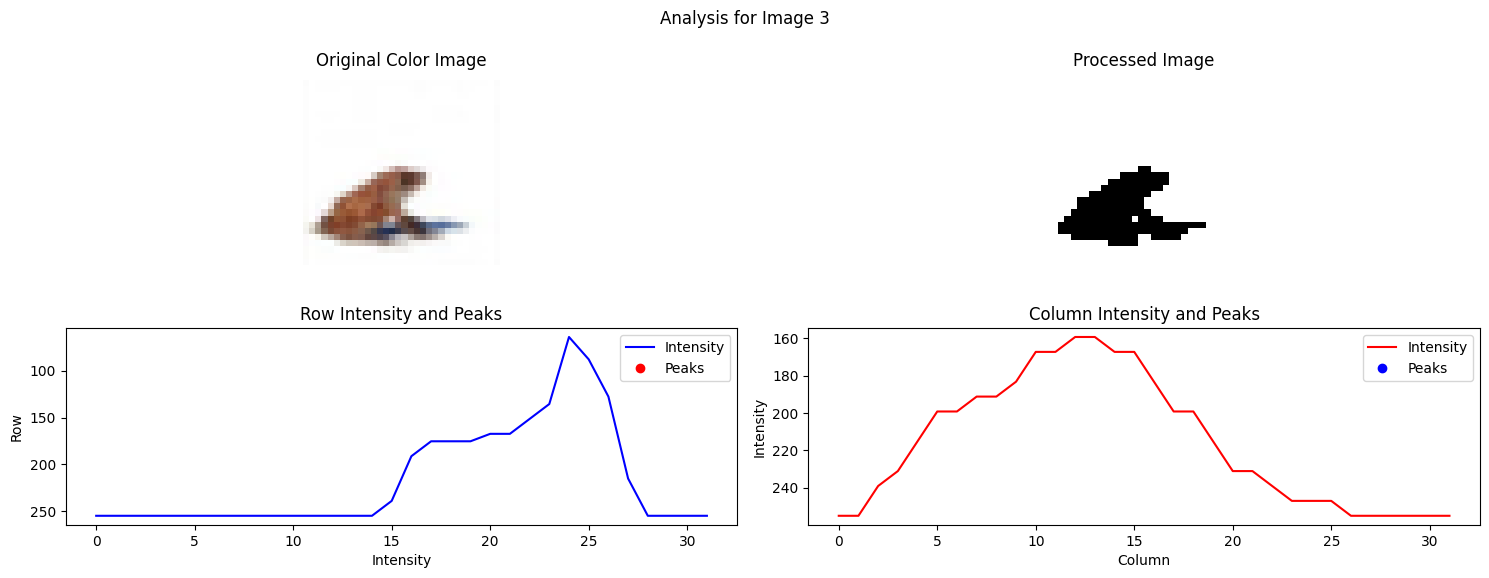

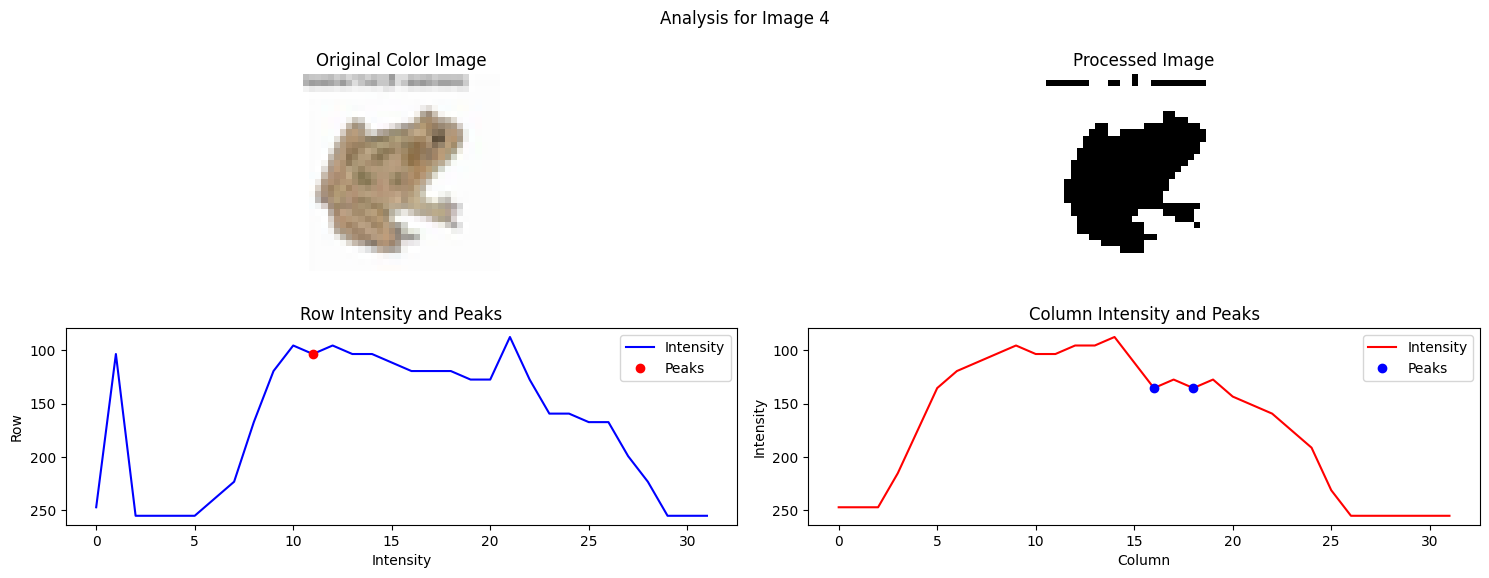

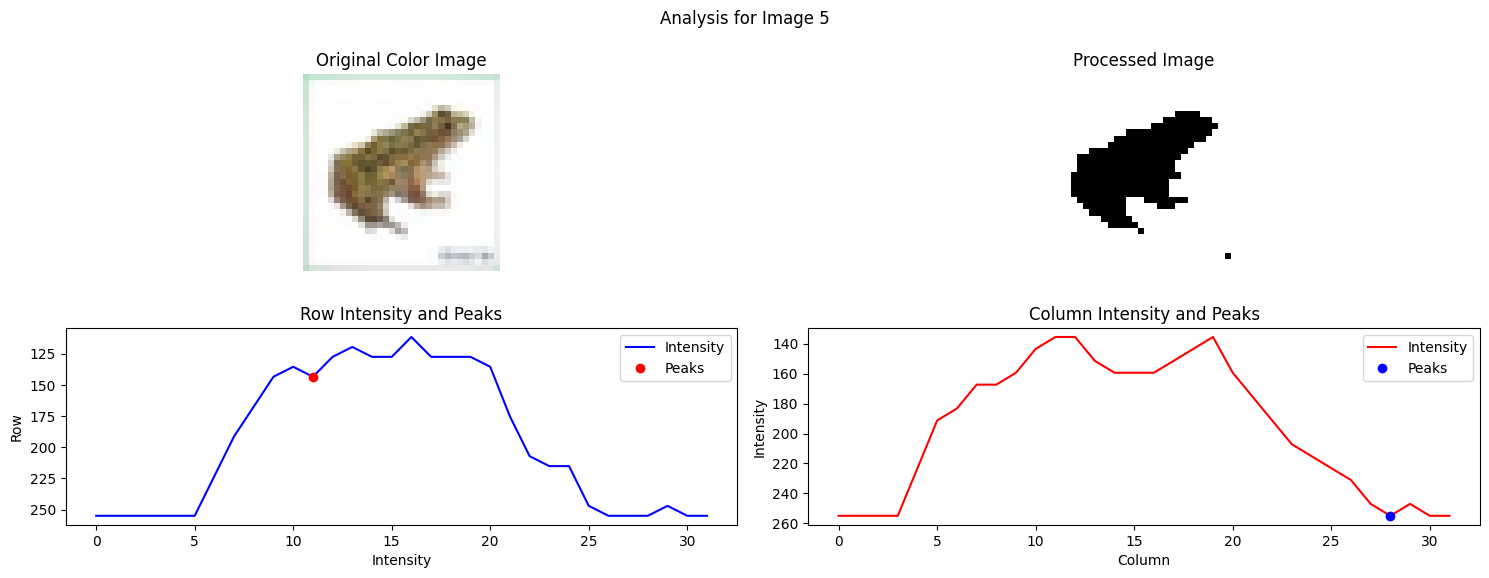

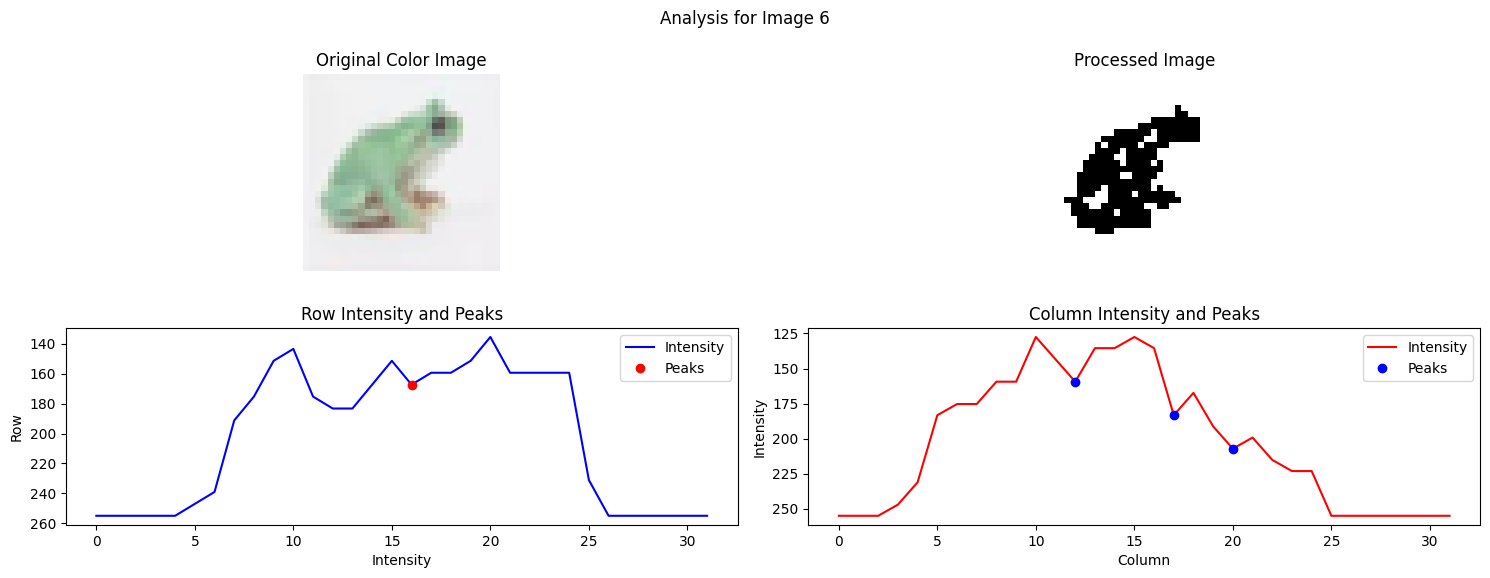

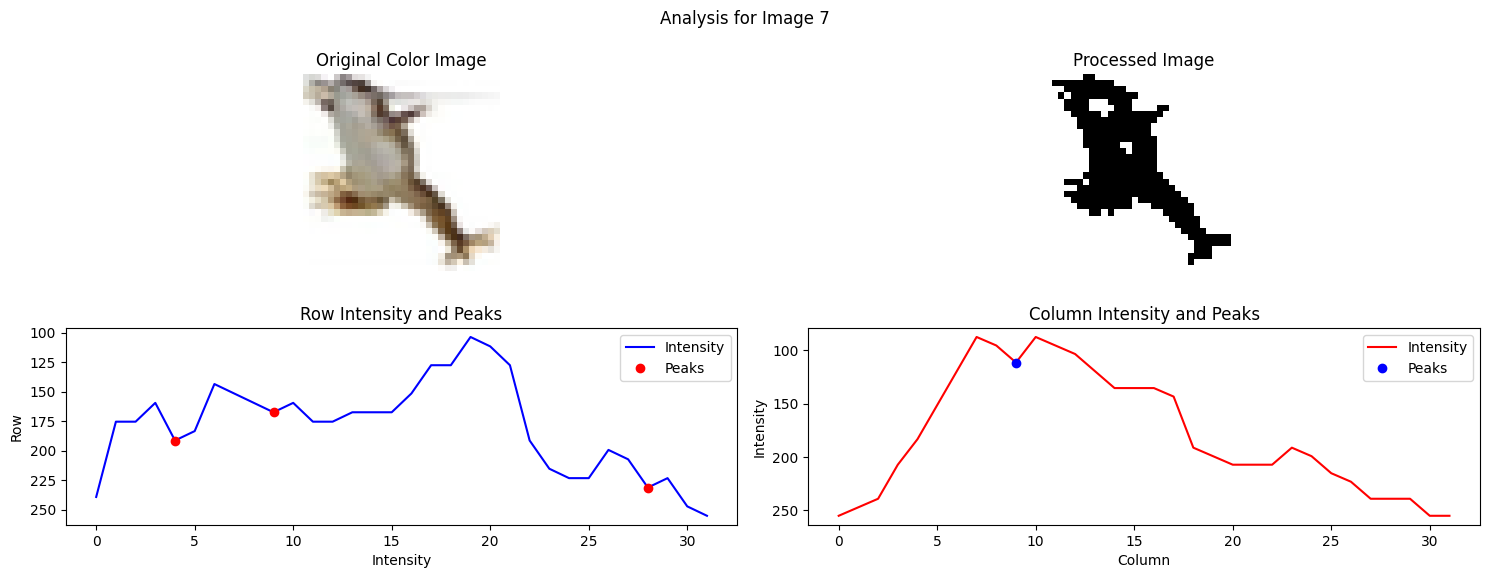

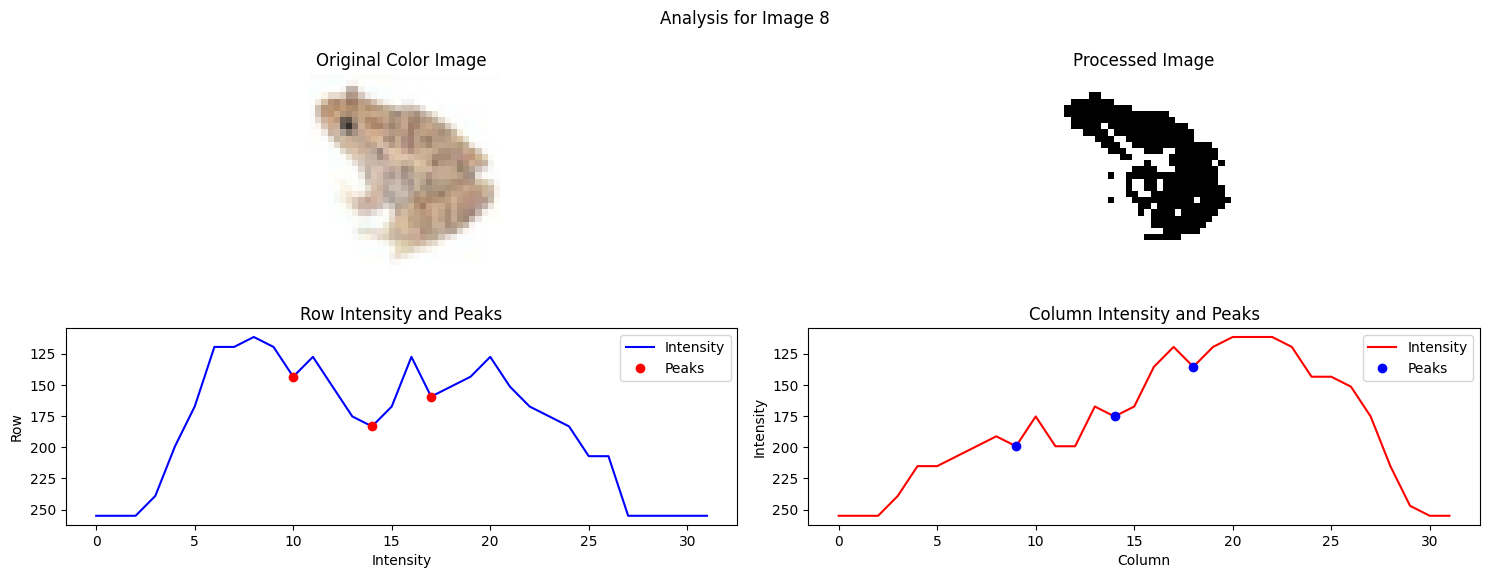

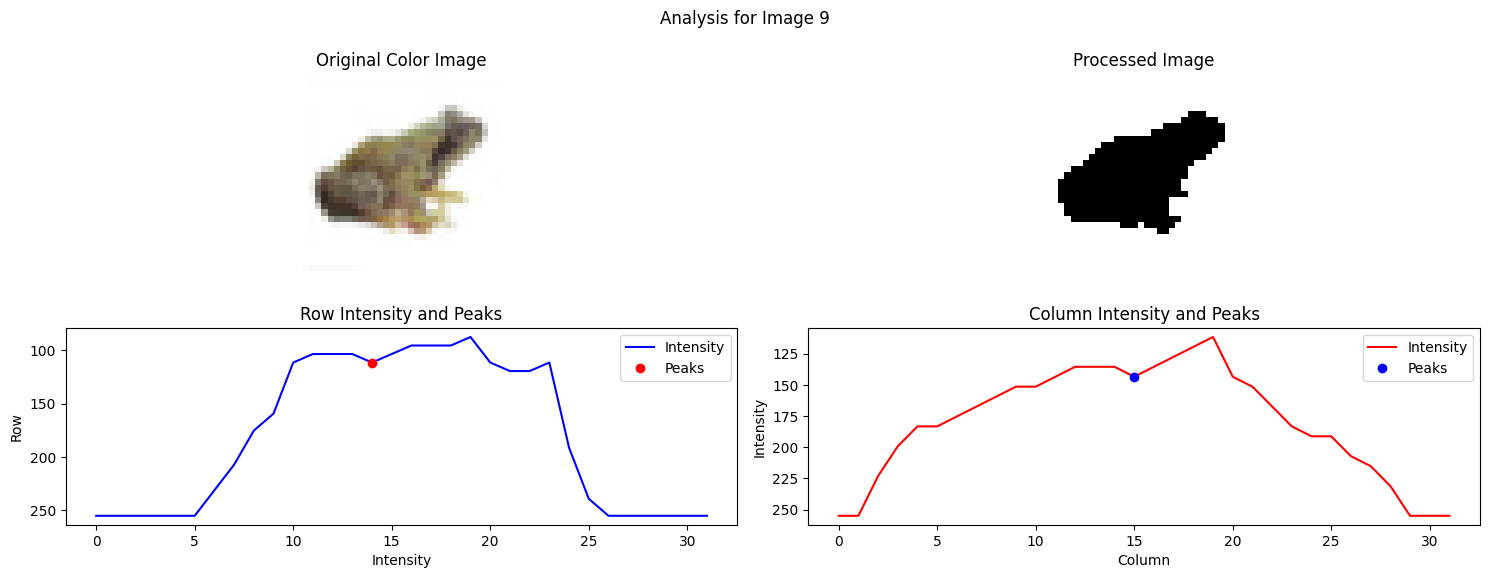

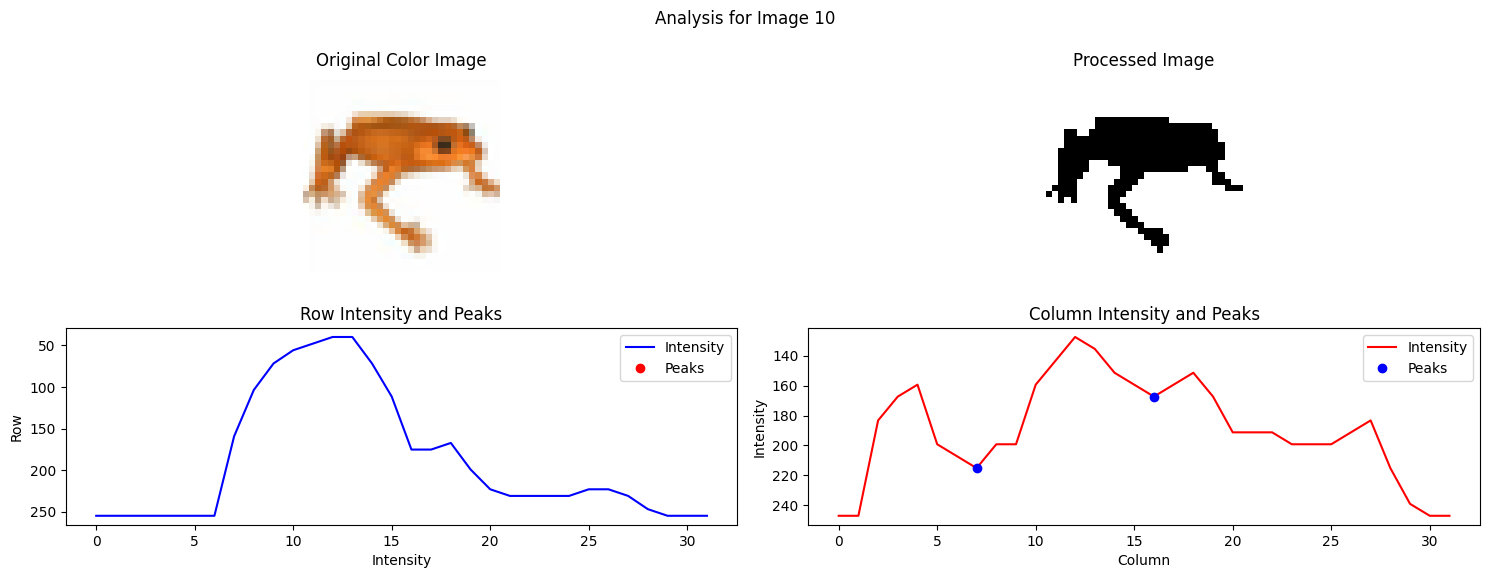

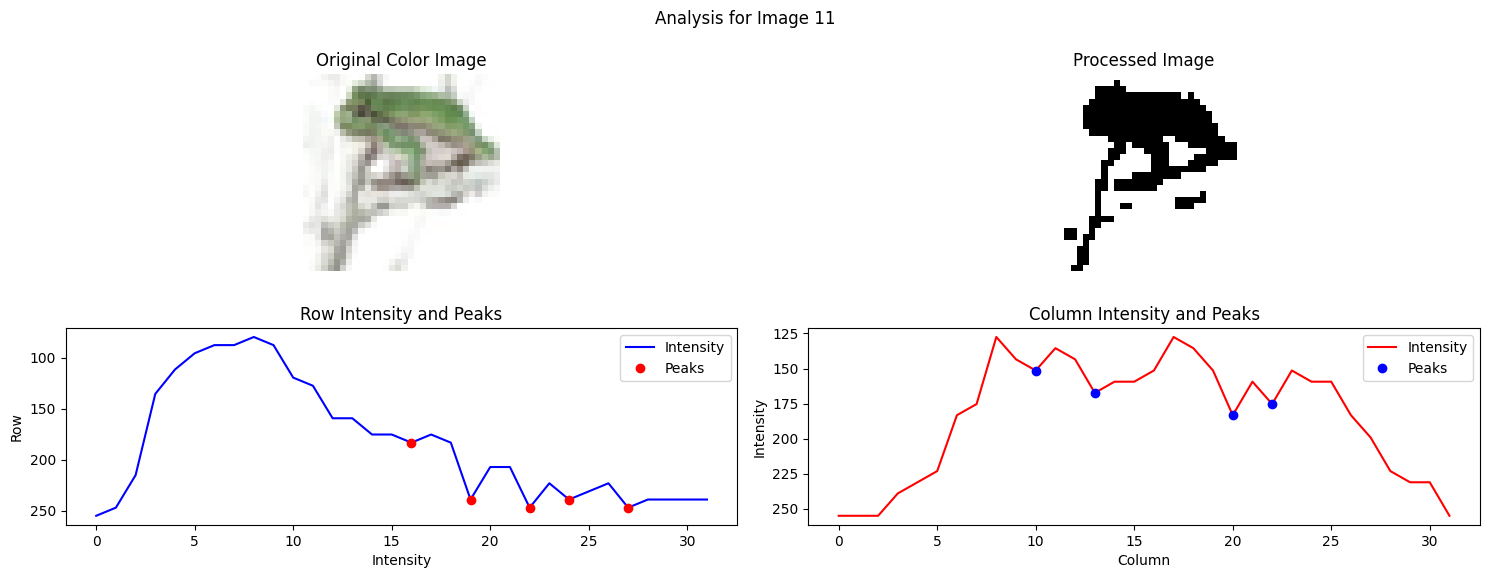

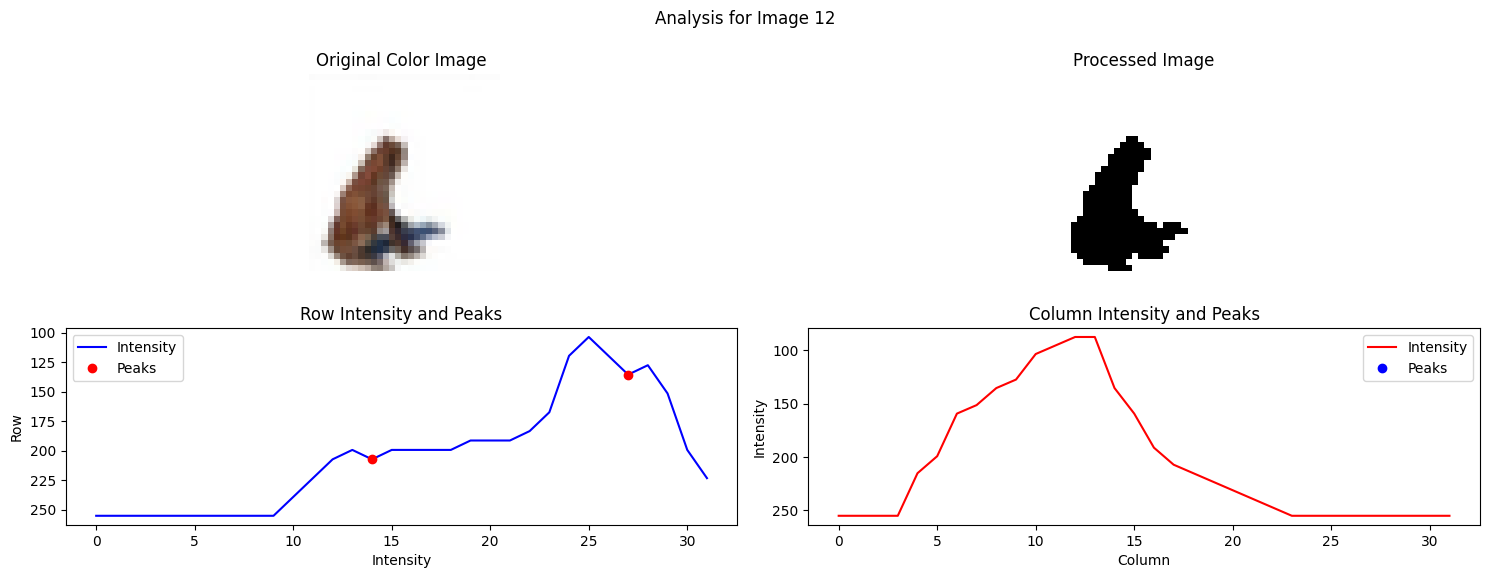

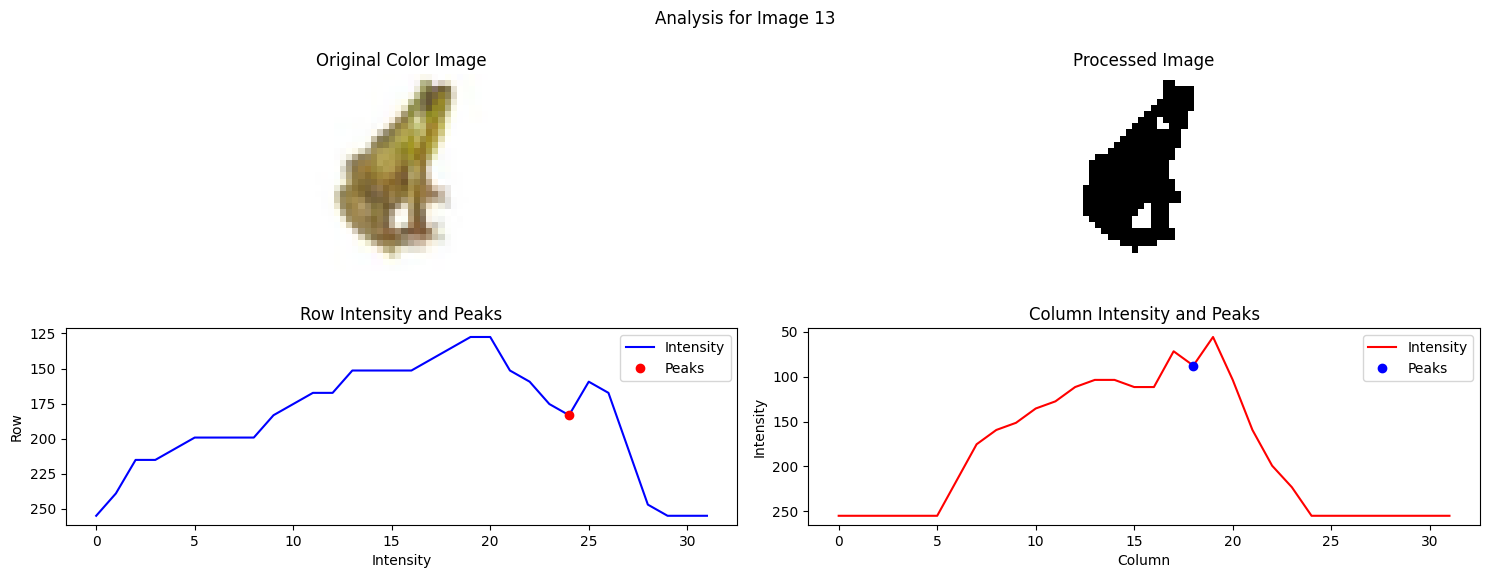

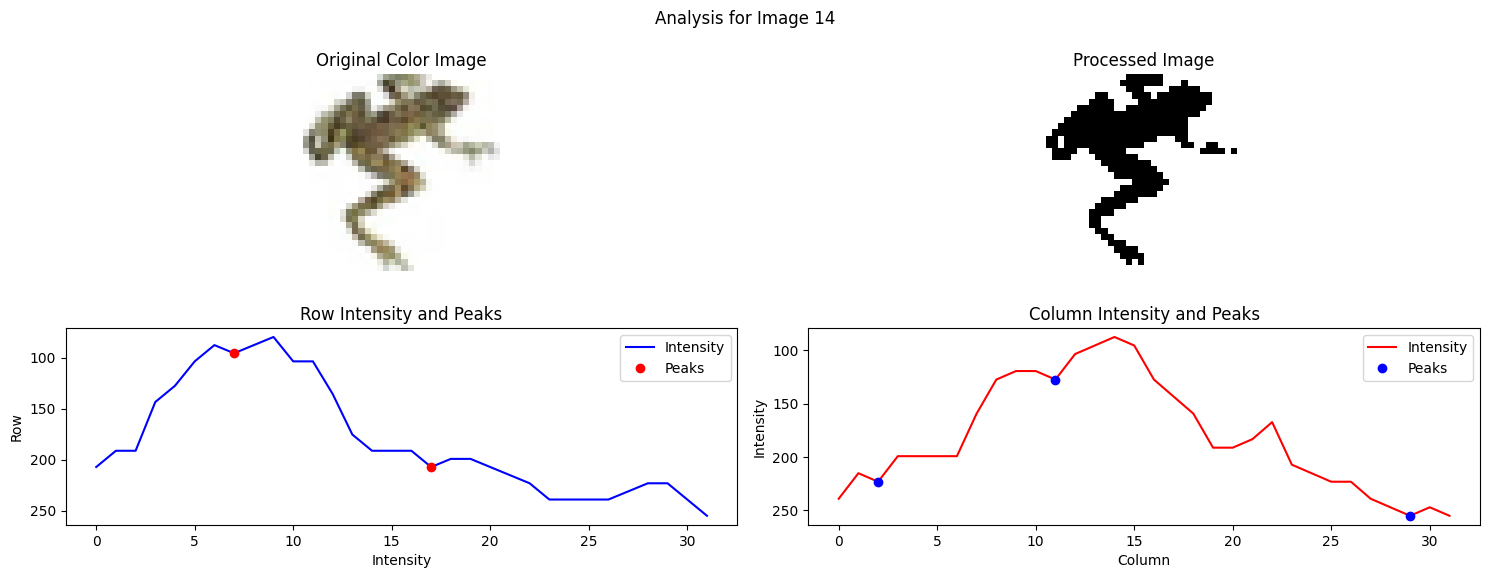

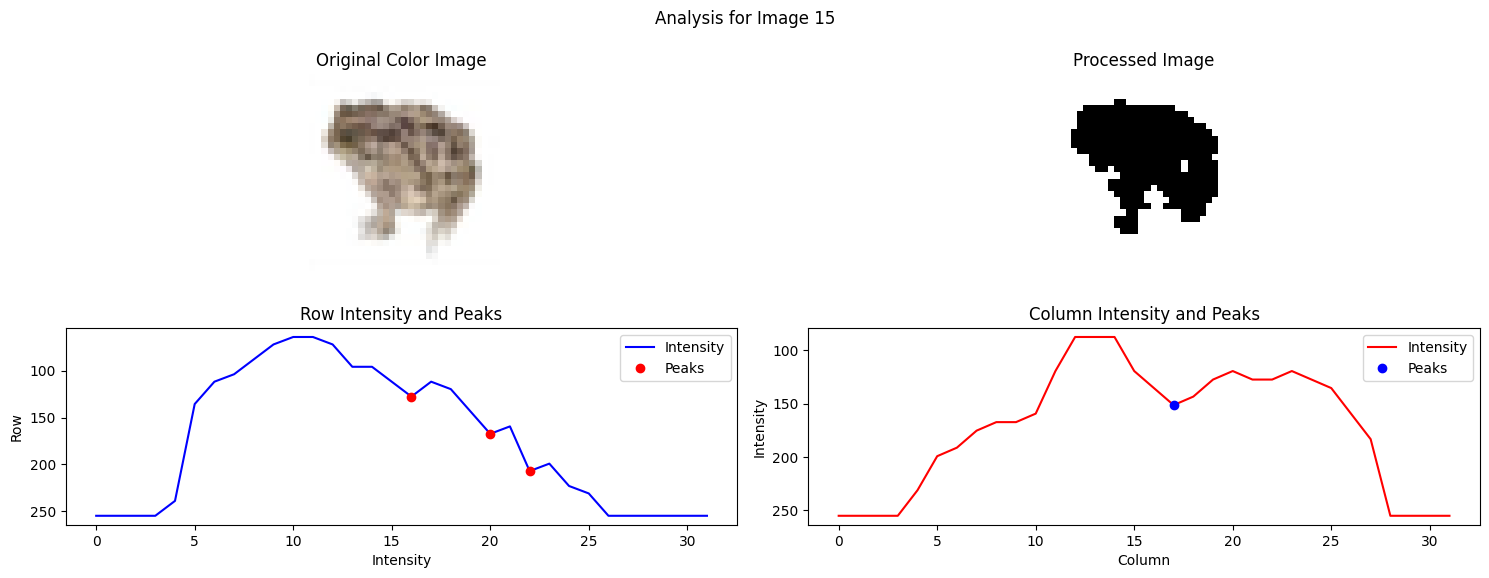

Table of Peaks Data:
       Image           Row Peaks    Column Peaks
0    Image 1       8, 11, 25, ,         14, , , 
1    Image 2            , , , ,           , , , 
2    Image 3            , , , ,           , , , 
3    Image 4          11, , , ,       16, 18, , 
4    Image 5          11, , , ,         28, , , 
5    Image 6          16, , , ,     12, 17, 20, 
6    Image 7        4, 9, 28, ,          9, , , 
7    Image 8      10, 14, 17, ,      9, 14, 18, 
8    Image 9          14, , , ,         15, , , 
9   Image 10            , , , ,        7, 16, , 
10  Image 11  16, 19, 22, 24, 27  10, 13, 20, 22
11  Image 12        14, 27, , ,           , , , 
12  Image 13          24, , , ,         18, , , 
13  Image 14         7, 17, , ,      2, 11, 29, 
14  Image 15      16, 20, 22, ,         17, , , 


In [12]:
def find_intensity_peaks(intensity):
    # Calculate the difference in intensity
    diff = np.diff(intensity)
    # Find the peak positions
    peaks = np.where((diff[:-1] > 0) & (diff[1:] < 0))[0] + 1
    return peaks

# Lists to store the peak positions
all_row_peaks = []
all_col_peaks = []

for idx, (original, processed) in enumerate(zip(white_background_frogs, inverted_thresholded_images)):
    # Calculate mean intensity for rows and columns
    row_intensity = np.mean(processed, axis=1)
    col_intensity = np.mean(processed, axis=0)
    
    # Find peaks
    row_peaks = find_intensity_peaks(row_intensity)
    col_peaks = find_intensity_peaks(col_intensity)
    
    all_row_peaks.append(row_peaks)
    all_col_peaks.append(col_peaks)
    
    # Plotting the images and their intensity graphs
    plt.figure(figsize=(15, 8))
    
    plt.suptitle(f"Analysis for Image {idx + 1}")  # Overall title for the plot
    
    # Display the original color image
    plt.subplot(3, 2, 1)
    plt.imshow(original)
    plt.title('Original Color Image')
    plt.axis('off')
    
    # Display the processed image
    plt.subplot(3, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')
    
    # Display row intensity graph
    plt.subplot(3, 2, 3)
    plt.plot(row_intensity, 'b-', label='Intensity')
    plt.plot(row_peaks, row_intensity[row_peaks], 'ro', label='Peaks')
    plt.xlabel('Intensity')
    plt.ylabel('Row')
    plt.title('Row Intensity and Peaks')
    plt.gca().invert_yaxis()  # Inverting the Y-axis
    plt.legend()
    
    # Display column intensity graph
    plt.subplot(3, 2, 4)
    plt.plot(col_intensity, 'r-', label='Intensity')
    plt.plot(col_peaks, col_intensity[col_peaks], 'bo', label='Peaks')
    plt.xlabel('Column')
    plt.ylabel('Intensity')
    plt.title('Column Intensity and Peaks')
    plt.gca().invert_yaxis()  # Inverting the Y-axis
    plt.legend()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust spacing to fit the suptitle
    plt.show()

# Create DataFrame to analyze the peaks data
df_row_peaks = pd.DataFrame(all_row_peaks, dtype=object).fillna('')
df_col_peaks = pd.DataFrame(all_col_peaks, dtype=object).fillna('')

table = pd.DataFrame(columns=['Image', 'Row Peaks', 'Column Peaks'])
table['Image'] = [f'Image {i + 1}' for i in range(len(white_background_frogs))]
table['Row Peaks'] = df_row_peaks.apply(lambda x: ', '.join([str(i) for i in x]), axis=1)
table['Column Peaks'] = df_col_peaks.apply(lambda x: ', '.join([str(i) for i in x]), axis=1)

print("Table of Peaks Data:")
print(table)


## **Analysis of Results**

From the table above, which provides the row and column peaks for each image in our dataset and visualized images an graphics, we'll dissect this data to see how it can be useful:

### **Insights Drawn From the Data:**

1. **Presence of Objects:** The sheer presence of peaks in rows or columns indicates the presence of some distinct features or objects in the image. For example, Images 2 and 3, which lack any peaks, might have a uniform distribution of intensity or lack prominent features.

2. **Object Density and Complexity:** Multiple peaks in a single row or column can be indicative of:
   - Multiple objects or features present along that axis. For instance, Image 11 seems to have a complex structure with multiple row and column peaks.
   - A single object having complex patterns or boundaries.

3. **Object Positioning:** The specific positions of the peaks might give us an idea of where the features or objects lie. For example, in Image 1, the row peaks at positions 8, 11, and 25 indicate potential features or boundaries of objects at these positions.

4. **Orientation and Distribution:** A disparity between the number of row and column peaks can hint at the general orientation of objects. More row peaks compared to column peaks might suggest a horizontal distribution of features, and vice versa.

5. **Size and Shape Implications:** By looking at the spread of peaks, one can deduce the potential size of the object. If the peaks are close, the object might be smaller; if they're spread out, it could be larger or elongated.

### **Potential Applications of these Insights:**

1. **Image Categorization:** Based on the density and distribution of peaks, images can be categorized into groups, e.g., images with single large objects, images with multiple small objects, or images without prominent features.

2. **Guided Object Detection:** For algorithms that require an initial guess or seed point for object detection (like region-growing algorithms), the peaks can serve as potential starting points.

3. **Content Summarization:** For a quick summarization or thumbnailing application, understanding where the intensity peaks are can guide the algorithm in focusing on the most 'intense' or 'feature-rich' part of the image.

4. **Improvement in Processing Time:** For certain image processing tasks, instead of processing the entire image, focusing on regions around the peaks can drastically reduce computation time.

Armed with these insights, one can optimize further image processing tasks or use this analysis as a foundation for more advanced image recognition and categorization methods.

---

## Geometric Analysis of Peaks

To perform a geometric analysis of the peaks, we can follow these steps:

1. **Measure Distances Between Consecutive Peaks**:
    - This can be achieved by calculating the differences between consecutive peak values for each row and column.

2. **Analyze the Distances**:
    - A statistical analysis of the distances can reveal if there are frequently occurring distances or repeating patterns.

3. **Determine High-Density Peak Regions**:
    - This can be achieved by calculating peak density in certain intervals and identifying regions where the density is the highest.

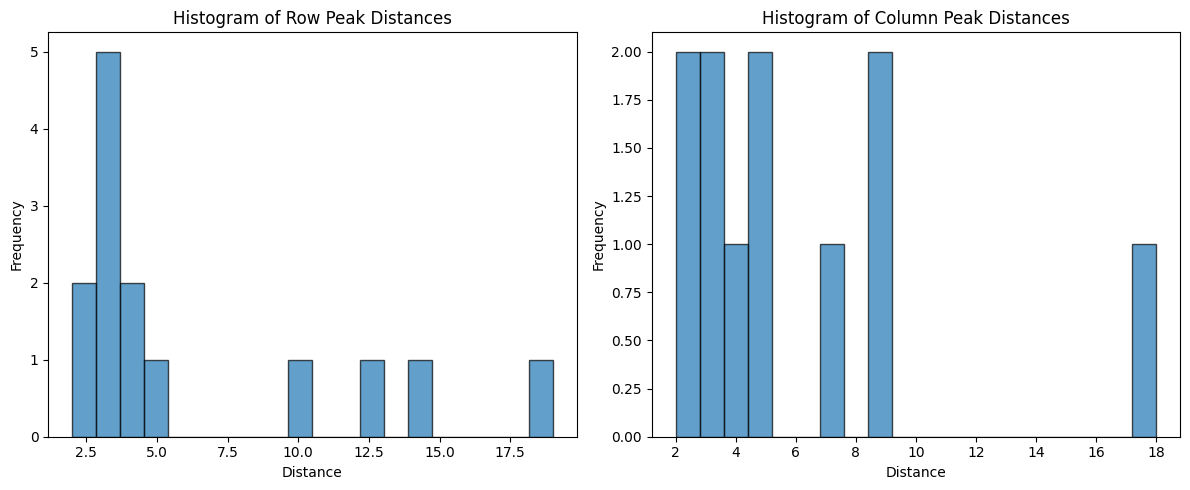

High Density Regions (Rows): [[0], [], [], [], [], [], [0], [0], [], [], [0], [], [], [], [0]]
High Density Regions (Columns): [[], [], [], [0], [], [0], [], [0], [], [], [0, 1], [], [], [], []]


In [13]:
def calculate_differences(peaks):
    return np.diff(peaks) if len(peaks) > 1 else np.array([])

# Calculate differences for each set of peaks
row_diffs = [calculate_differences(peaks) for peaks in all_row_peaks]
col_diffs = [calculate_differences(peaks) for peaks in all_col_peaks]

# Analyzing differences
row_diffs_flat = np.concatenate(row_diffs)
col_diffs_flat = np.concatenate(col_diffs)

# Plot histograms to visualize common distances between peaks
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(row_diffs_flat, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Row Peak Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(col_diffs_flat, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Column Peak Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Determine high-density regions
def high_density_regions(differences):
    # Here, we'll consider regions with more than one peak within a distance of 5 as high-density
    density = [1]  # Start with a density of 1 for the first peak
    for diff in differences:
        if diff <= 5:
            density[-1] += 1  # Increase density if within distance
        else:
            density.append(1)  # Reset density for new region
    return [i for i, d in enumerate(density) if d > 1]

# Getting high-density regions
rows_high_density = [high_density_regions(diff) for diff in row_diffs]
cols_high_density = [high_density_regions(diff) for diff in col_diffs]

print("High Density Regions (Rows):", rows_high_density)
print("High Density Regions (Columns):", cols_high_density)


## Observations Based on the Results

From the obtained results, we can make the following observations:

1. In most of the images (columns and rows), there are no high-density regions. This suggests that the peaks in them are either uniformly distributed or the distances between them are large.

2. However, in a few images, there exist high-density regions, indicating specific areas in the image where there is increased activity or detail. For instance, in image 11 (columns), there are two consecutive high-density regions, suggesting a zone in the image where there are many peaks very close to each other.

To identify images with high-density regions:
- Examine the printed results which show lists of high-density regions for rows and columns. The position in the list corresponds to the image or column number.
- For a graphical representation, look at the histogram of peak distances. Regions with high-density will have bars (representing frequency) close to each other, especially for distances under the threshold you set (in this case, a distance of 5).

These observations can have various implications:

- If the images represent different scenes or objects, the presence of high-density regions might point towards specific details or active zones.
  
- If the images represent a time series of events (e.g., a sequence of video frames), then the high-density regions might be associated with dynamic changes in the scene.

Depending on the specific context and analysis goal, a more detailed examination of the images with high-density regions might be needed. For example, using other image processing methods to determine the features of these regions or to extract additional characteristics.

---

## **Detailed Observations and Implications from Our Analysis**:

1. **Analysis of Image Peaks**:
   - From our investigation into the peaks (high contrast or activity points) across the different images, we discerned that most of the images lack high-density regions. This implies that these images might be devoid of certain active or detailed areas.
   - However, several images do manifest regions of high density. Such regions allude to areas where there is enhanced activity or granularity, possibly resulting from a specific structure, texture, or other notable feature within the image.

2. **Implications Drawn from the Analysis**: 
   - The presence of high-density regions could indicate zones within an image containing pertinent details or active areas. This insight becomes especially beneficial if the images represent various scenes or objects.
   - Should the images depict a chronological sequence of events (e.g., a succession of video frames), high-density regions could point to dynamic shifts or evolutions within the scene.
   - 
3. **Potential Applications**:
   - Based on this analysis and provided the context or intended use of the images, we can make informed decisions regarding their further processing or evaluation. For instance, if these images were medical scans, high-density regions might hint at areas of heightened activity or change, necessitating closer scrutiny.

4. **Limitations**:
   - Our current approach hinges on discerning differences between the peaks within the images. While this provides some insight into the image's structure, it doesn’t furnish a comprehensive view of all its characteristics or peculiarities. 

In conclusion, our analysis enables the identification and understanding of potentially significant areas within the images. However, for a more nuanced and comprehensive understanding, it would be prudent to integrate other image processing methodologies.

---

[Back to Main](../Project.ipynb)